<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Rock Paper Scissors CV Project (YOLO9)</p></b></h1
    
### Table of contents:

* [Dowenloading Dataset](#1)
* [IMPORTING LIBRARIES](#2)
* [Loading Model YOLOV9](#3)
* [Training Model in Custom Dataset](#4)
* [Evaluation](#5)
* [Show Results](#6)
* [Test Model](#7)
* [Like this? Upvote and comment! 🌊 End](#8)
    

<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Dowenloading Dataset</p></b></h1>

In [1]:
!pip install roboflow
!pip install ultralytics
from roboflow import Roboflow
rf = Roboflow(api_key="EJVfU57oVVqyNxwLK3Tx")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 14.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov9:: 100%|██████████| 14682/14682 [00:01<00:00, 8634.82it/s]


<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">IMPORTING LIBRARIES</p></b></h1>

In [2]:
import os
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import wandb
wandb.init(mode="disabled")

<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Loading Model YOLOV9</p></b></h1>

In [3]:
model = YOLO('yolov9s.pt')

100%|██████████| 14.7M/14.7M [00:00<00:00, 122MB/s]


<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Training Model in Custom Dataset</p></b></h1>

In [4]:
# Train the model using your dataset
results = model.train(
    data='/kaggle/input/data-umal/data.yaml',  # Path to the dataset configuration file
    epochs=50,         # Number of training epochs
    imgsz=640,         # Image size for training
    batch=16,          # Batch size
    workers=4          # Number of data loading workers
)

Ultralytics YOLOv8.2.90 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/kaggle/input/data-umal/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-09-08 21:37:49,173	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-08 21:37:49,715	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 73.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/rock-paper-scissors-14/train/labels... 6455 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [00:04<00:00, 1462.54it/s]


train: New cache created: /kaggle/working/rock-paper-scissors-14/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/rock-paper-scissors-14/valid/labels... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 1395.52it/s]


val: New cache created: /kaggle/working/rock-paper-scissors-14/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.92G      1.308      2.429      1.682          8        640: 100%|██████████| 404/404 [03:14<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.94it/s]

                   all        576        400      0.468      0.439      0.433      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       5.8G      1.447      2.007      1.806          5        640: 100%|██████████| 404/404 [03:04<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]

                   all        576        400      0.582      0.437      0.505      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.82G      1.472      2.002      1.833          5        640: 100%|██████████| 404/404 [02:59<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]

                   all        576        400      0.419      0.466       0.43      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.8G      1.386      1.853      1.758         18        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]

                   all        576        400      0.696        0.6        0.7      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       5.8G      1.333      1.691      1.718          6        640: 100%|██████████| 404/404 [02:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]

                   all        576        400      0.682      0.664      0.719      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.8G      1.275      1.524      1.671         10        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]

                   all        576        400       0.68      0.686      0.723      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.8G      1.201      1.407      1.597         12        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]

                   all        576        400      0.716       0.78       0.81       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       5.8G      1.176      1.319      1.586          8        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]

                   all        576        400      0.789      0.745      0.833      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       5.8G      1.135      1.252      1.559          9        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]

                   all        576        400      0.818      0.753      0.836      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       5.8G      1.113      1.195      1.531         12        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        576        400      0.842       0.78      0.865      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       5.8G      1.091      1.131      1.513          9        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]

                   all        576        400      0.835      0.775      0.842      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       5.8G      1.086      1.103      1.509          5        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.52it/s]

                   all        576        400      0.865      0.786       0.87      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       5.8G      1.066      1.075      1.497          4        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        576        400      0.797      0.882      0.865      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       5.8G      1.037       1.03       1.47         11        640: 100%|██████████| 404/404 [02:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]

                   all        576        400      0.807      0.846      0.876      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       5.8G      1.016     0.9971      1.452          8        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]

                   all        576        400      0.907      0.806      0.904      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       5.8G      1.016     0.9678      1.453          7        640: 100%|██████████| 404/404 [02:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        576        400      0.887      0.867        0.9      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.8G     0.9838     0.9433      1.429          6        640: 100%|██████████| 404/404 [02:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        576        400      0.876       0.86      0.886      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       5.8G     0.9827      0.914      1.424         15        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        576        400      0.915      0.875      0.925      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.8G     0.9547     0.8778      1.397         11        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]

                   all        576        400       0.91      0.862      0.914      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       5.8G     0.9515     0.8695      1.404          9        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        576        400      0.891      0.879      0.884      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       5.8G     0.9517     0.8575        1.4         11        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        576        400      0.902      0.872      0.916       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       5.8G     0.9171     0.8218      1.375          5        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        576        400      0.925      0.891      0.933      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       5.8G     0.9182     0.8085      1.368         13        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        576        400       0.92      0.902      0.922      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       5.8G     0.9178     0.7932      1.371          9        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        576        400      0.941      0.881      0.939      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       5.8G     0.8854      0.776      1.354          8        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        576        400      0.929      0.928      0.936      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.8G     0.8684     0.7702      1.336         16        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        576        400      0.929      0.916      0.938      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       5.8G     0.8633     0.7257      1.323         11        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]

                   all        576        400      0.935      0.891      0.931      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       5.8G     0.8608     0.7327      1.333          8        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        576        400      0.931      0.912      0.928      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       5.8G     0.8497     0.7097      1.325          8        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.74it/s]

                   all        576        400       0.93      0.913      0.938      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       5.8G     0.8371     0.7138      1.307         10        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]

                   all        576        400      0.939      0.914      0.939       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       5.8G      0.834     0.6823      1.309         12        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]

                   all        576        400      0.923      0.928      0.944       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       5.8G     0.8046     0.6638      1.285         14        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        576        400      0.941      0.915      0.942      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       5.8G      0.807     0.6519       1.29          5        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        576        400      0.947      0.931       0.95      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       5.8G     0.8014     0.6504      1.282          9        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        576        400      0.943      0.913      0.947       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       5.8G     0.7775     0.6369      1.265          7        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]

                   all        576        400      0.945      0.939      0.947      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       5.8G     0.7662       0.61      1.256          8        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.74it/s]

                   all        576        400      0.935       0.93       0.95      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       5.8G     0.7687     0.6071      1.254         15        640: 100%|██████████| 404/404 [02:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]

                   all        576        400      0.962      0.917      0.951       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       5.8G     0.7513     0.5907      1.243         12        640: 100%|██████████| 404/404 [02:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        576        400      0.951      0.941      0.948       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       5.8G     0.7362     0.5665      1.232          7        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        576        400      0.942      0.932      0.947      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       5.8G     0.7247     0.5593      1.228         11        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.75it/s]

                   all        576        400      0.945      0.939      0.947      0.775


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       5.8G     0.5989     0.3615      1.157          5        640: 100%|██████████| 404/404 [02:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        576        400      0.949      0.938      0.956      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       5.8G     0.5817     0.3529      1.148          5        640: 100%|██████████| 404/404 [02:57<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        576        400      0.955      0.923      0.953      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       5.8G     0.5688     0.3325      1.135          6        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        576        400      0.951      0.928       0.95      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       5.8G     0.5405      0.308      1.108          5        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        576        400      0.948      0.924      0.953       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       5.8G     0.5354     0.3032      1.107          5        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.79it/s]

                   all        576        400       0.94      0.932      0.948      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       5.8G     0.5316      0.299      1.098          3        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        576        400      0.939      0.942      0.946      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       5.8G     0.5101      0.289      1.087          4        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]

                   all        576        400      0.949      0.935      0.946      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       5.8G     0.4979     0.2733      1.071          5        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        576        400      0.943      0.939      0.943       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       5.8G     0.4891     0.2688      1.068          6        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]

                   all        576        400      0.938      0.941      0.947      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       5.8G     0.4726     0.2603      1.055         10        640: 100%|██████████| 404/404 [02:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.75it/s]

                   all        576        400      0.938      0.949      0.948      0.774



50 epochs completed in 2.588 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 15.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.90 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9s summary (fused): 486 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.94it/s]


                   all        576        400      0.962      0.917      0.952       0.78
                 Paper        132        139      0.963      0.934      0.958      0.795
                  Rock        121        141      0.963      0.927      0.957      0.763
              Scissors        116        120      0.961      0.892      0.939      0.782
Speed: 0.2ms preprocess, 5.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Evaluation</p></b></h1>

In [5]:
evaluation = model.val(data='/kaggle/input/data-umal/data.yaml')

Ultralytics YOLOv8.2.90 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9s summary (fused): 486 layers, 7,168,249 parameters, 0 gradients, 26.7 GFLOPs


val: Scanning /kaggle/working/rock-paper-scissors-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:06<00:00,  5.41it/s]


                   all        576        400       0.96      0.915      0.952      0.779
                 Paper        132        139      0.957      0.928      0.958      0.796
                  Rock        121        141      0.963      0.926      0.957       0.76
              Scissors        116        120      0.961      0.892      0.939      0.781
Speed: 0.2ms preprocess, 6.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Show Results</p></b></h1>

In [6]:
def Show_Result(image_path):
    img = mpimg.imread(image_path)
    plt.style.use('dark_background')
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [7]:
pd.read_csv('/kaggle/working/runs/detect/train/results.csv')

epoch        train/box_loss        train/cls_loss  \
0                      1               1.30830               2.42860   
1                      2               1.44720               2.00690   
2                      3               1.47240               2.00220   
3                      4               1.38650               1.85260   
4                      5               1.33320               1.69140   
5                      6               1.27530               1.52440   
6                      7               1.20090               1.40650   
7                      8               1.17580               1.31870   
8                      9               1.13550               1.25220   
9                     10               1.11350               1.19530   
10                    11               1.09080               1.13140   
11                    12               1.08570               1.10300   
12                    13               1.06580               1.07520   
13                    14               1.03690               1.02960   
14                    15               1.01640               0.99711   
15                    16               1.01640               0.96779   
16                    17               0.98378               0.94330   
17                    18               0.98269               0.91397   
18                    19               0.95466               0.87782   
19                    20               0.95154               0.86946   
20                    21               0.95175               0.85747   
21                    22               0.91713               0.82179   
22                    23               0.91820               0.80846   
23                    24               0.91779               0.79322   
24                    25               0.88539               0.77600   
25                    26               0.86836               0.77016   
26                    27               0.86333               0.72571   
27                    28               0.86078               0.73269   
28                    29               0.84971               0.70965   
29                    30               0.83709               0.71383   
30                    31               0.83396               0.68225   
31                    32               0.80462               0.66380   
32                    33               0.80696               0.65191   
33                    34               0.80144               0.65038   
34                    35               0.77753               0.63689   
35                    36               0.76620               0.60999   
36                    37               0.76869               0.60714   
37                    38               0.75130               0.59073   
38                    39               0.73616               0.56652   
39                    40               0.72470               0.55929   
40                    41               0.59893               0.36147   
41                    42               0.58166               0.35295   
42                    43               0.56878               0.33247   
43                    44               0.54047               0.30804   
44                    45               0.53537               0.30318   
45                    46               0.53163               0.29897   
46                    47               0.51007               0.28897   
47                    48               0.49793               0.27335   
48                    49               0.48908               0.26882   
49                    50               0.47263               0.26027   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                 1.6820               0.46762               0.43917   
1                 1.8058               0.58244               0.43673   
2                 1.8332               0.41906               0.46598   
3                 1.7576               0.69611            

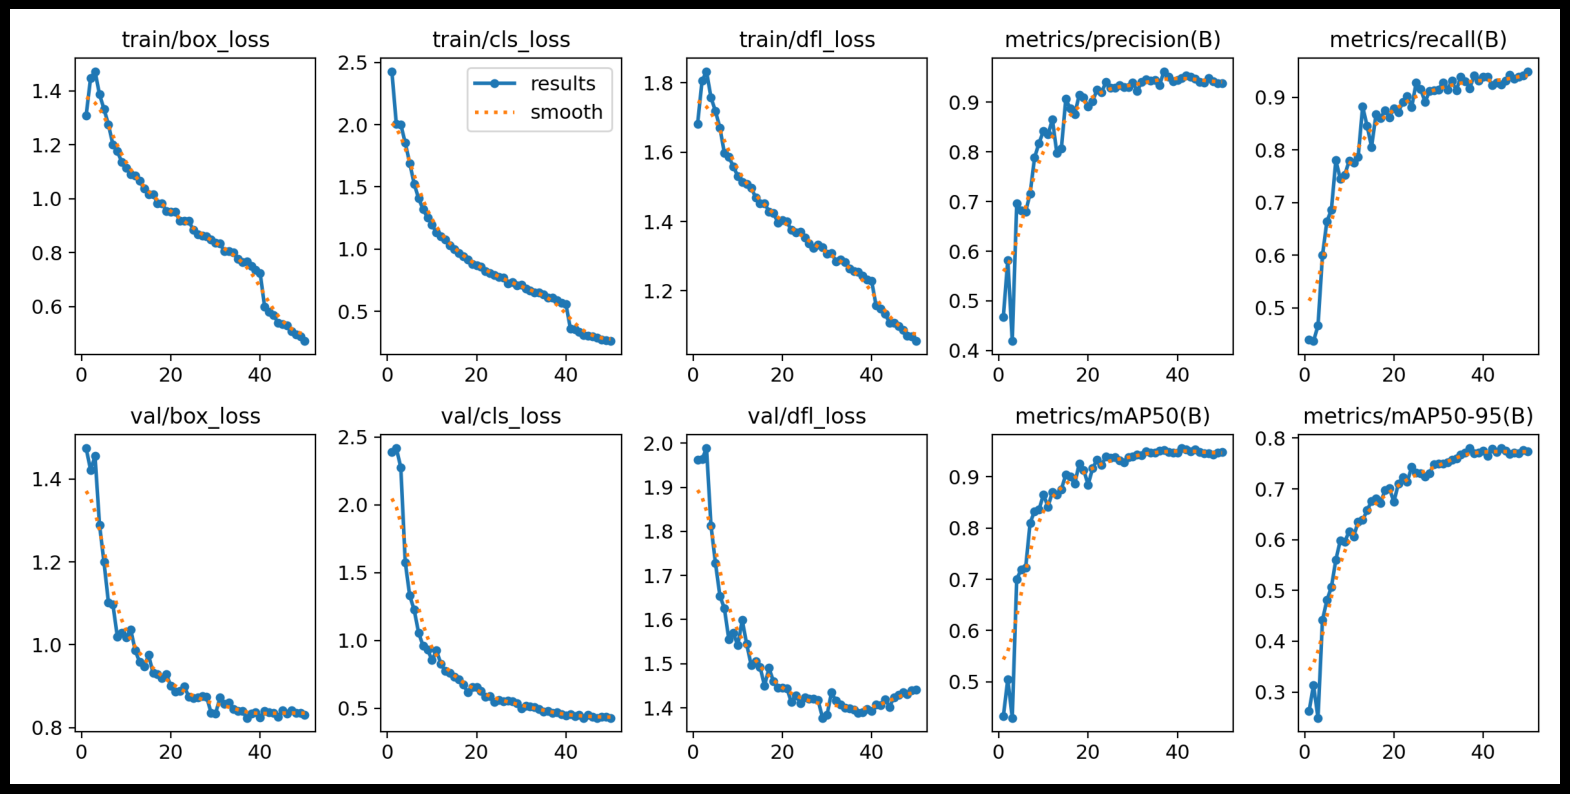

In [8]:
### Results
Show_Result('/kaggle/working/runs/detect/train/results.png')

In [9]:
path = os.path.join('/kaggle/working/runs/detect',os.listdir('/kaggle/working/runs/detect')[-1])
path

'/kaggle/working/runs/detect/train2'

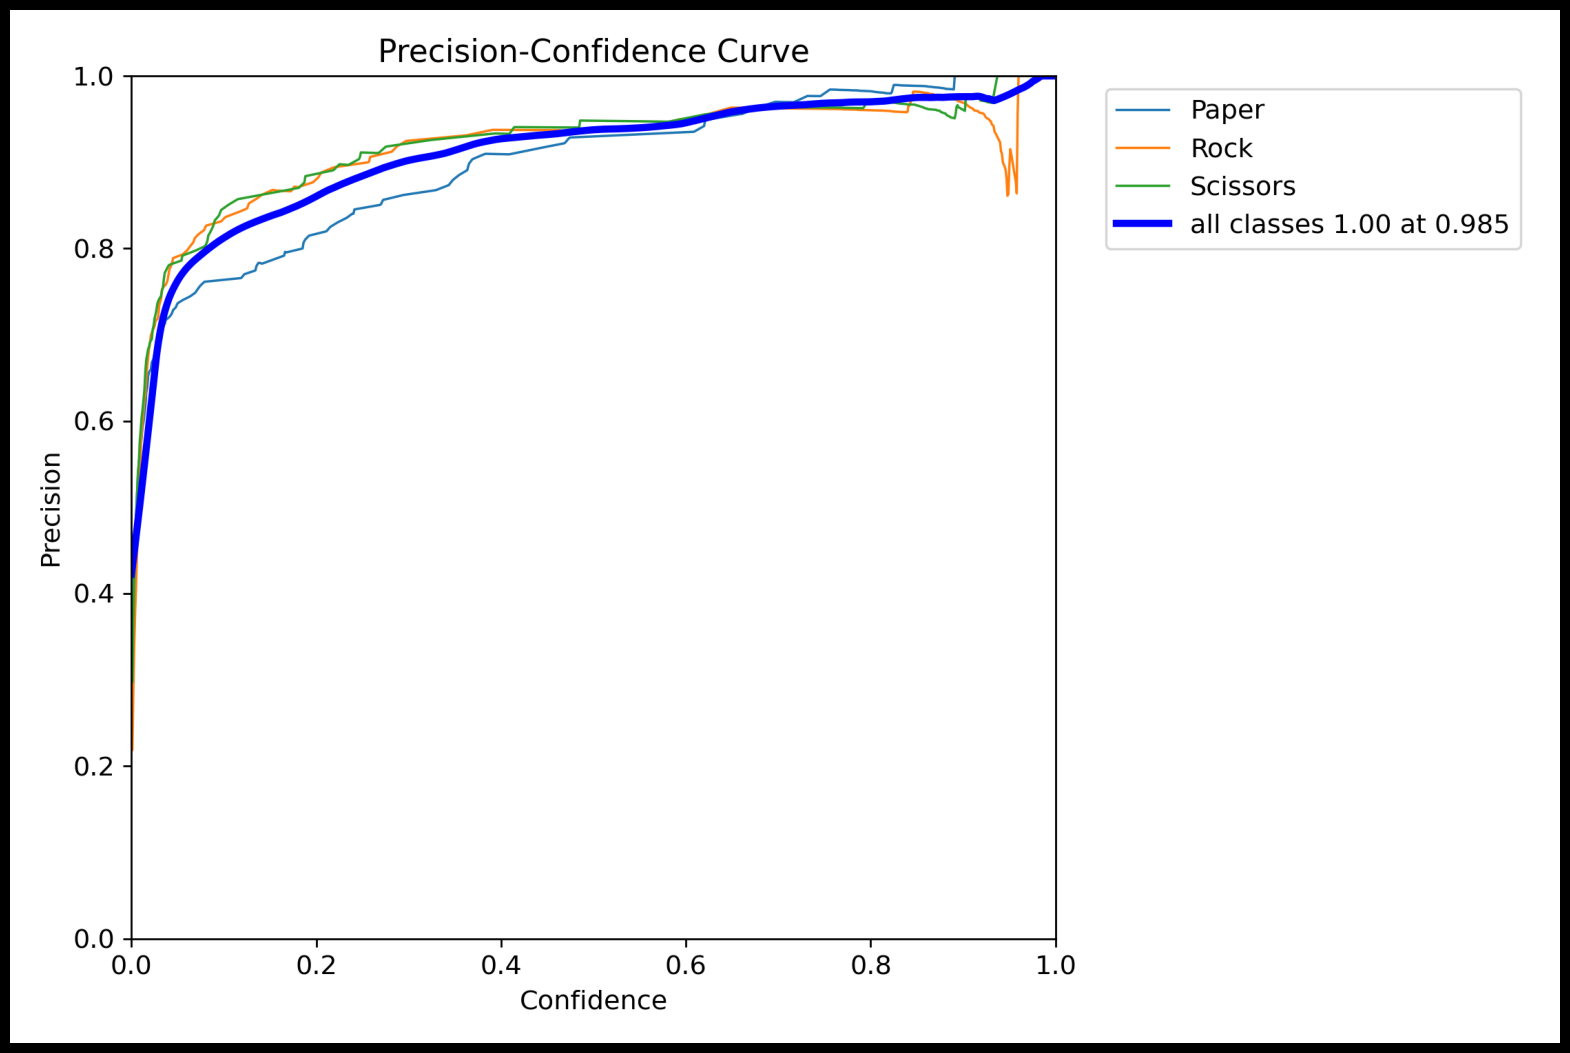

In [10]:
## Precision
Show_Result(os.path.join(path,'P_curve.png'))

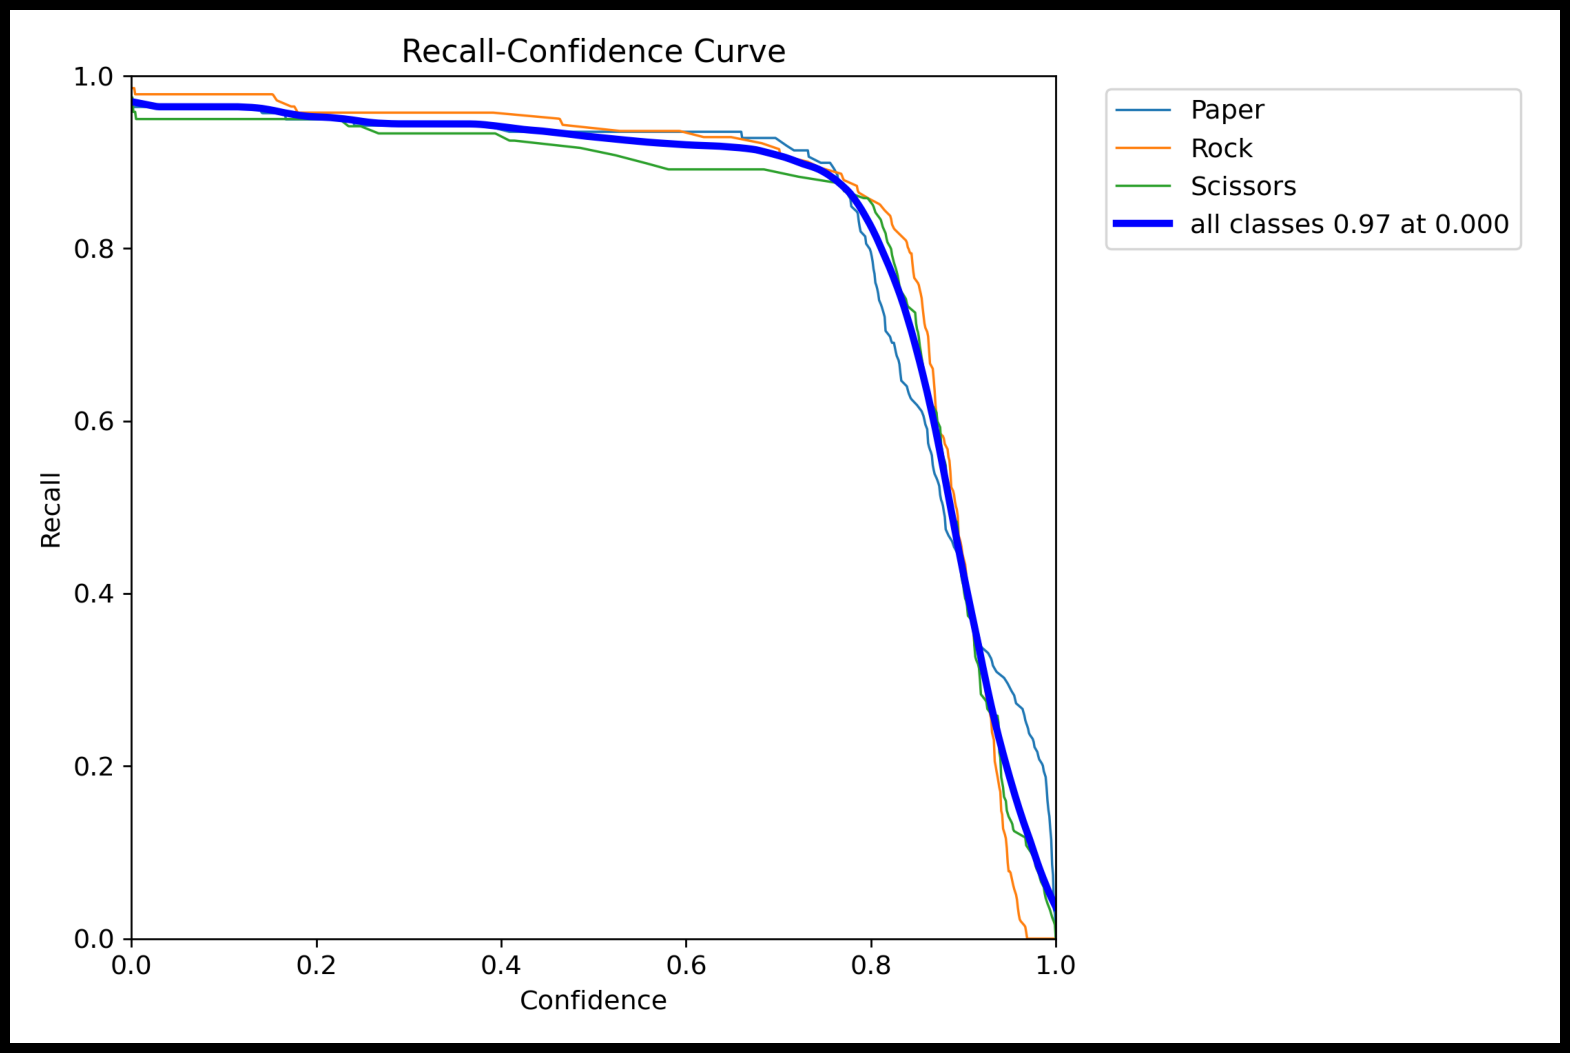

In [11]:
## Recall
Show_Result(os.path.join(path,'R_curve.png'))

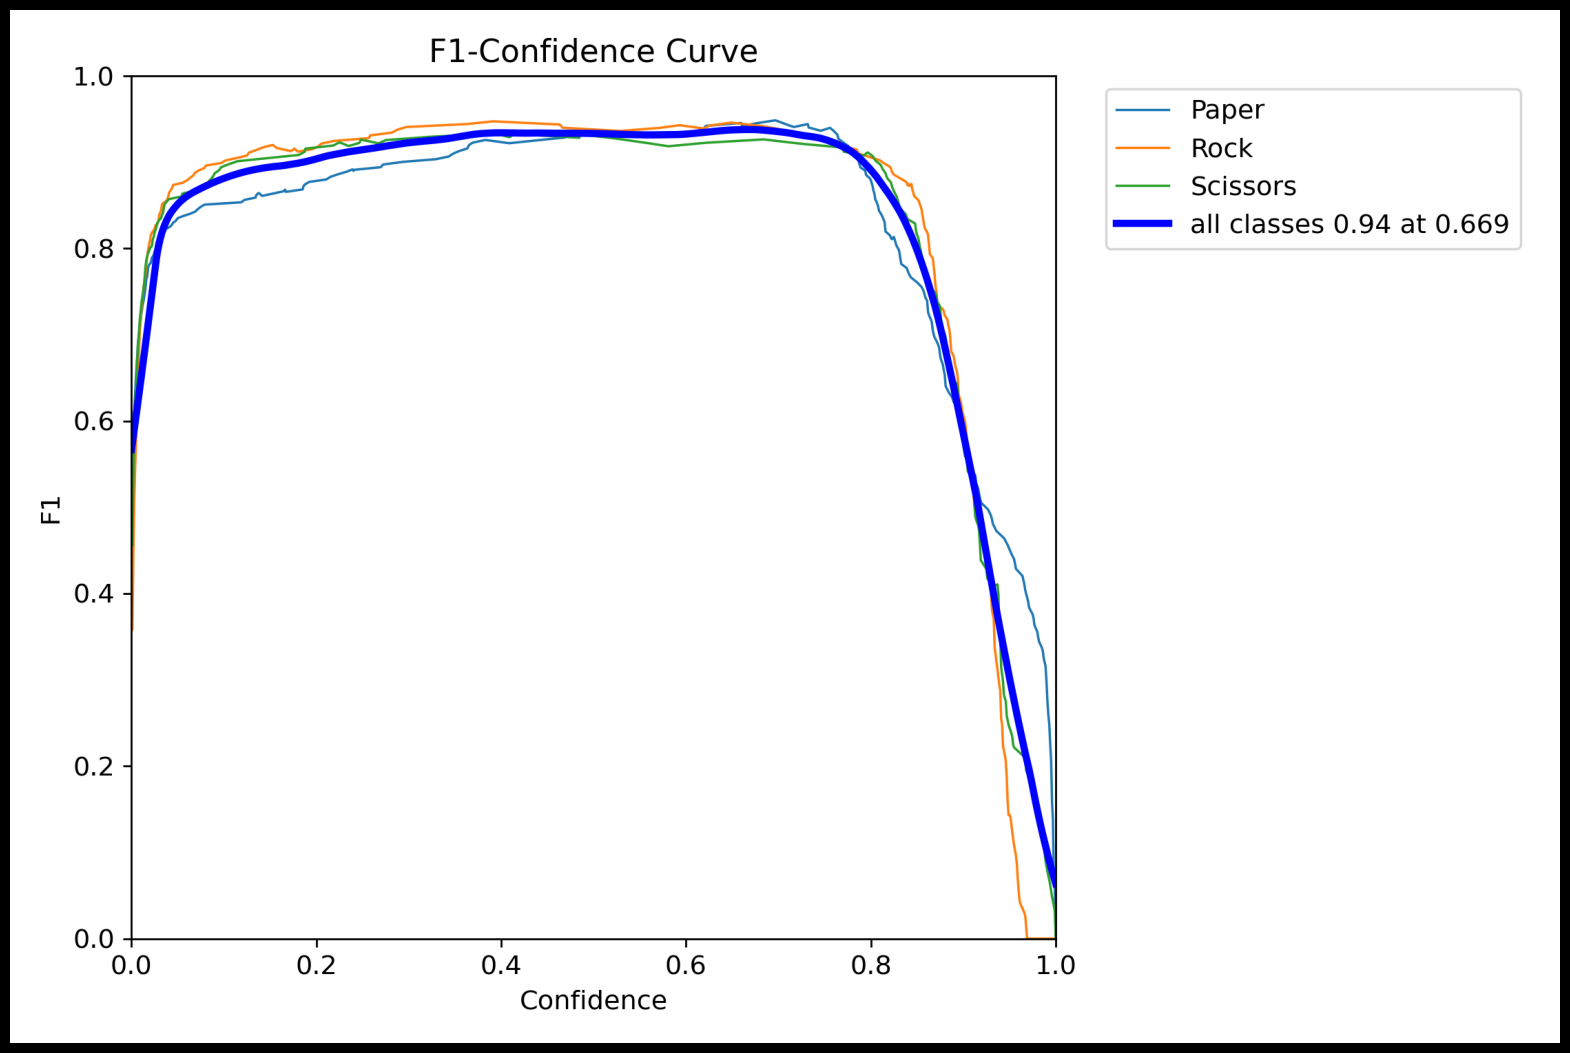

In [12]:
## F1
Show_Result(os.path.join(path,'F1_curve.png'))

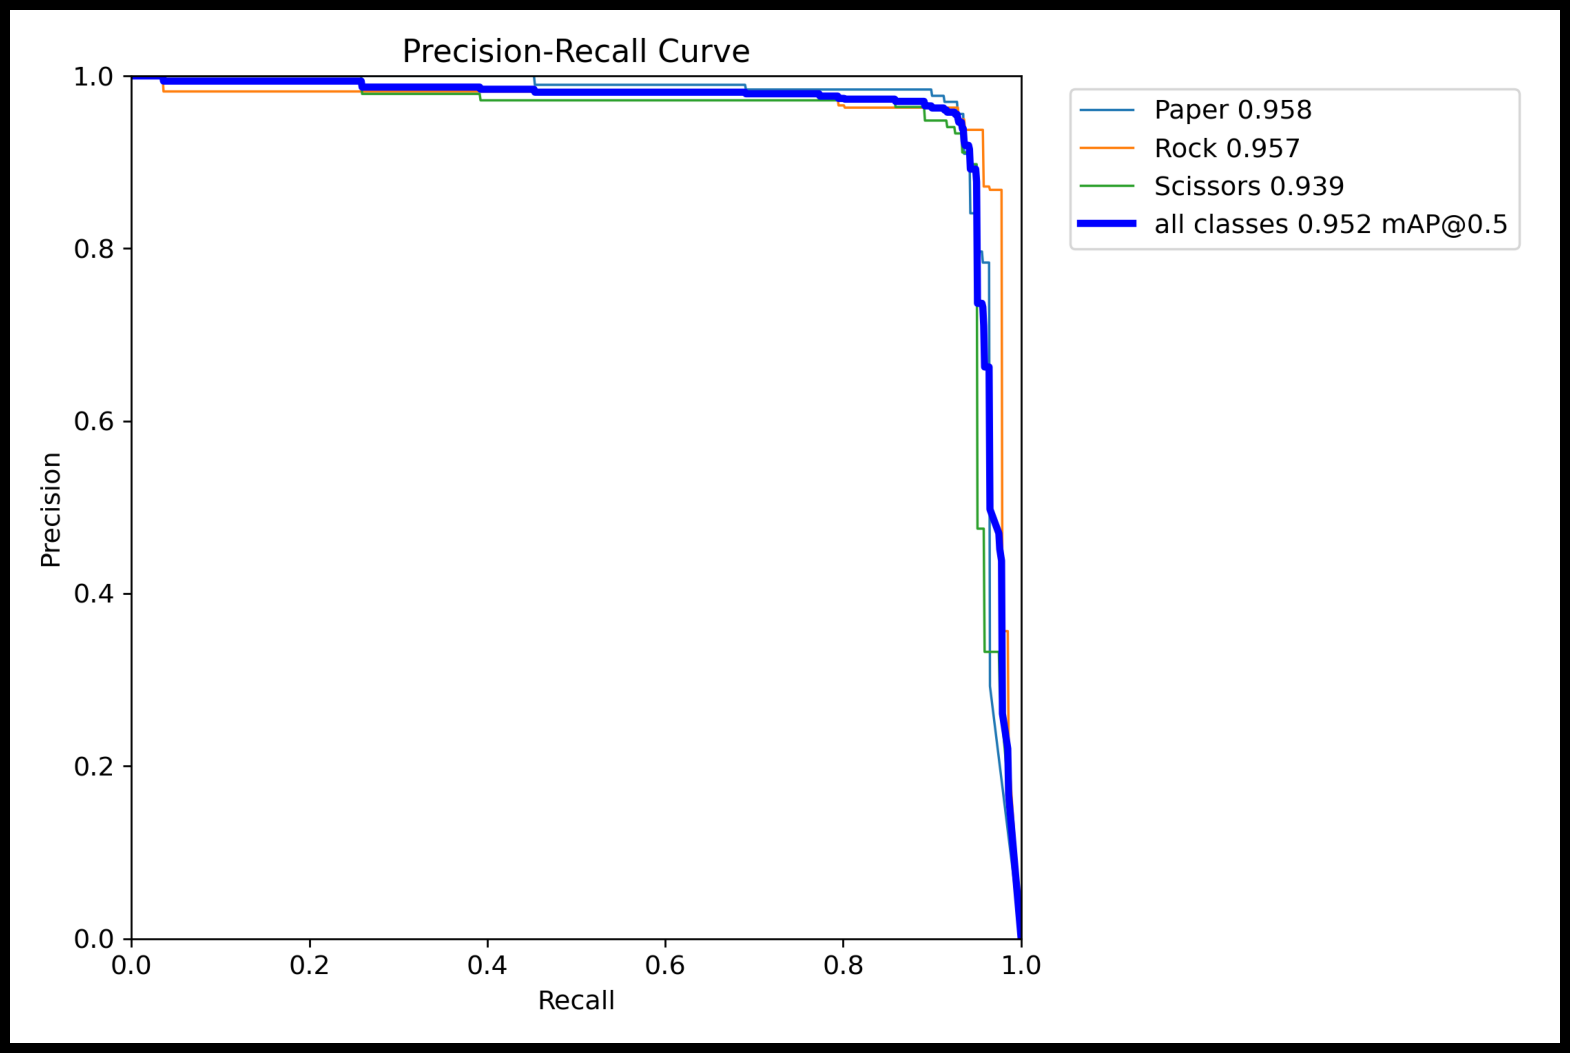

In [13]:
## Precision-Recall
Show_Result(os.path.join(path,'PR_curve.png'))

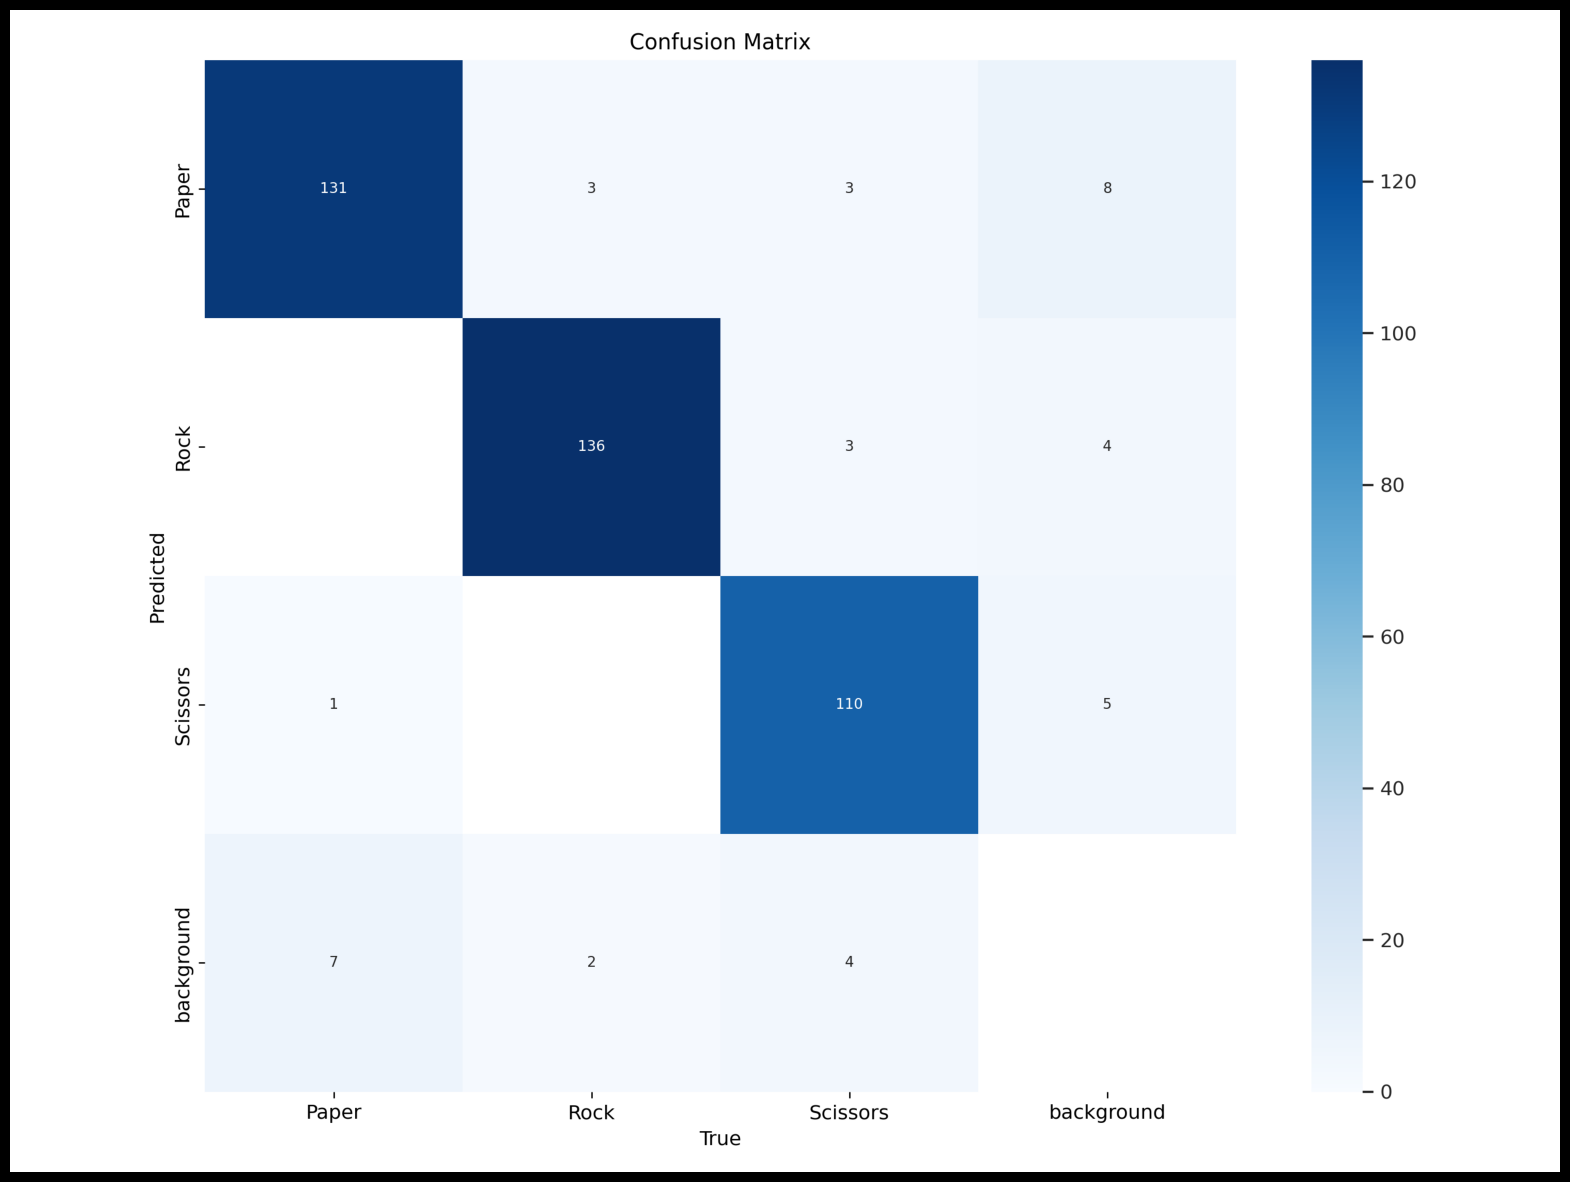

In [14]:
## Confusion Matrix
Show_Result(os.path.join(path,'confusion_matrix.png'))

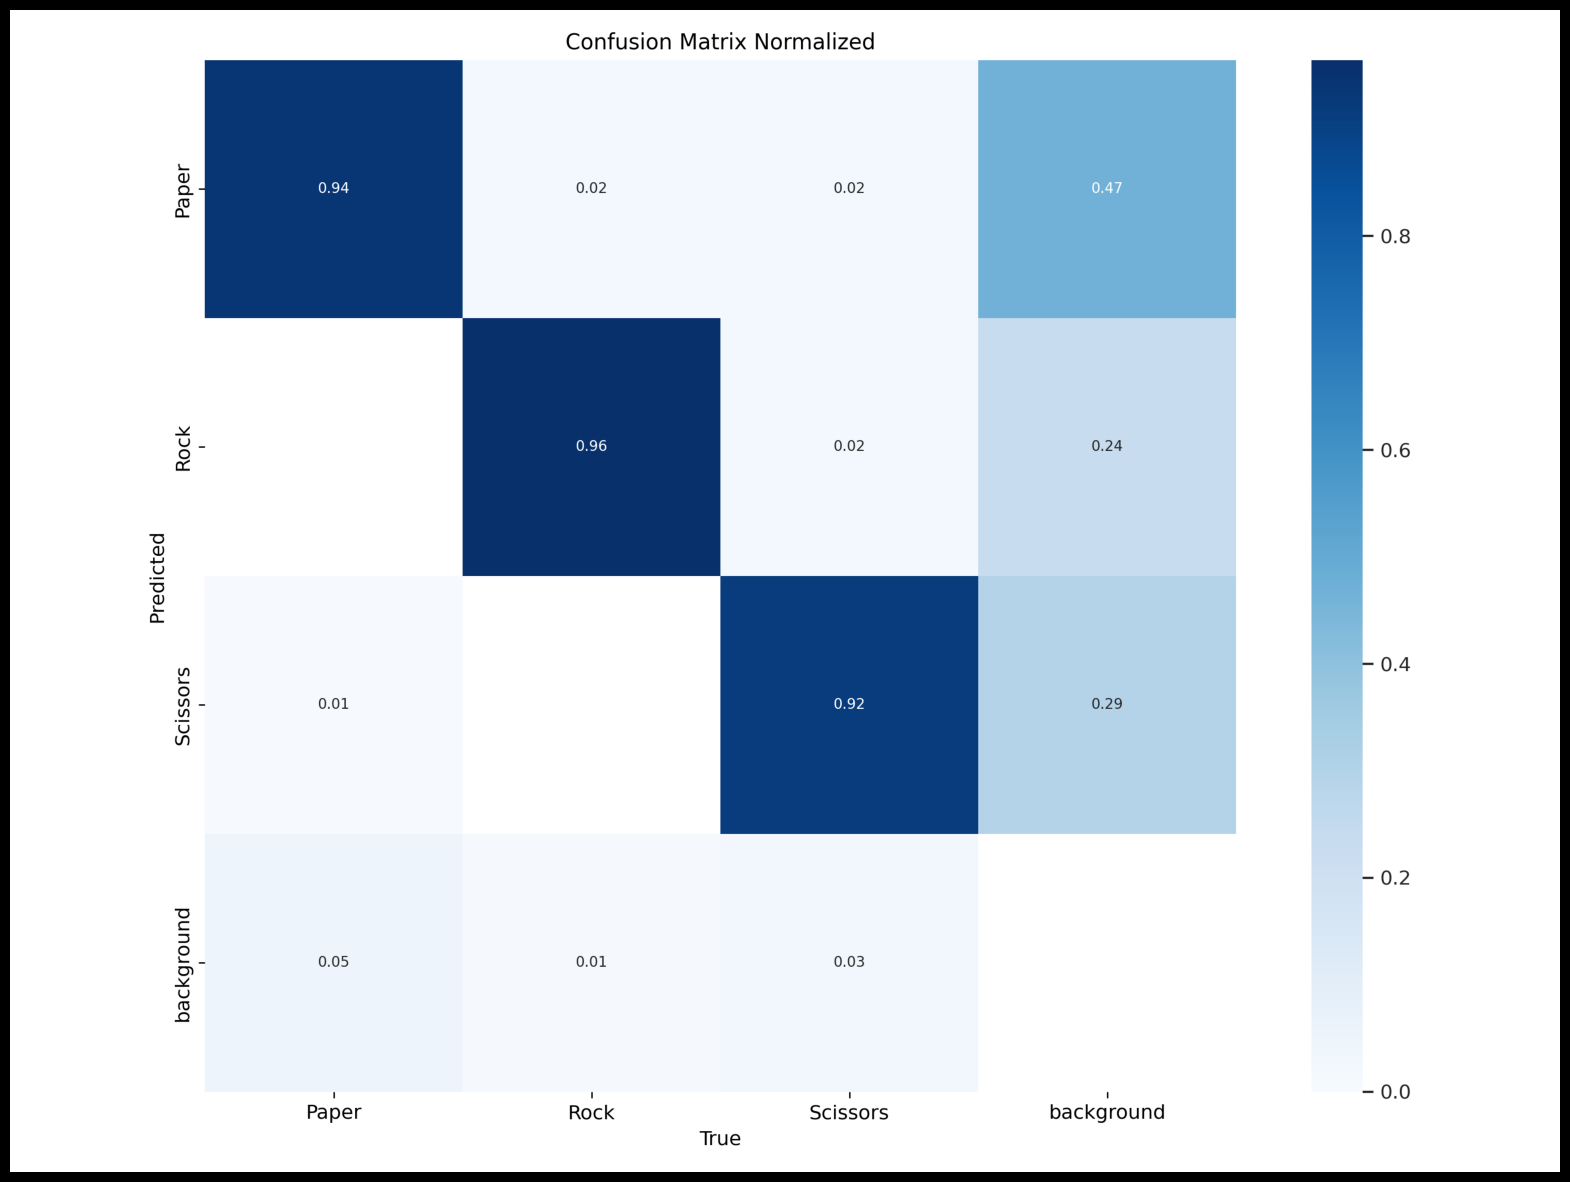

In [15]:
## Confusion Matrix Normalized
Show_Result(os.path.join(path,'confusion_matrix_normalized.png'))

<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Test Model</p></b></h1>

In [16]:
# Run inference on images in the 'test' folder
results = model.predict(source='/kaggle/working/rock-paper-scissors-14/test/images', imgsz=640, conf=0.5,verbose=False)

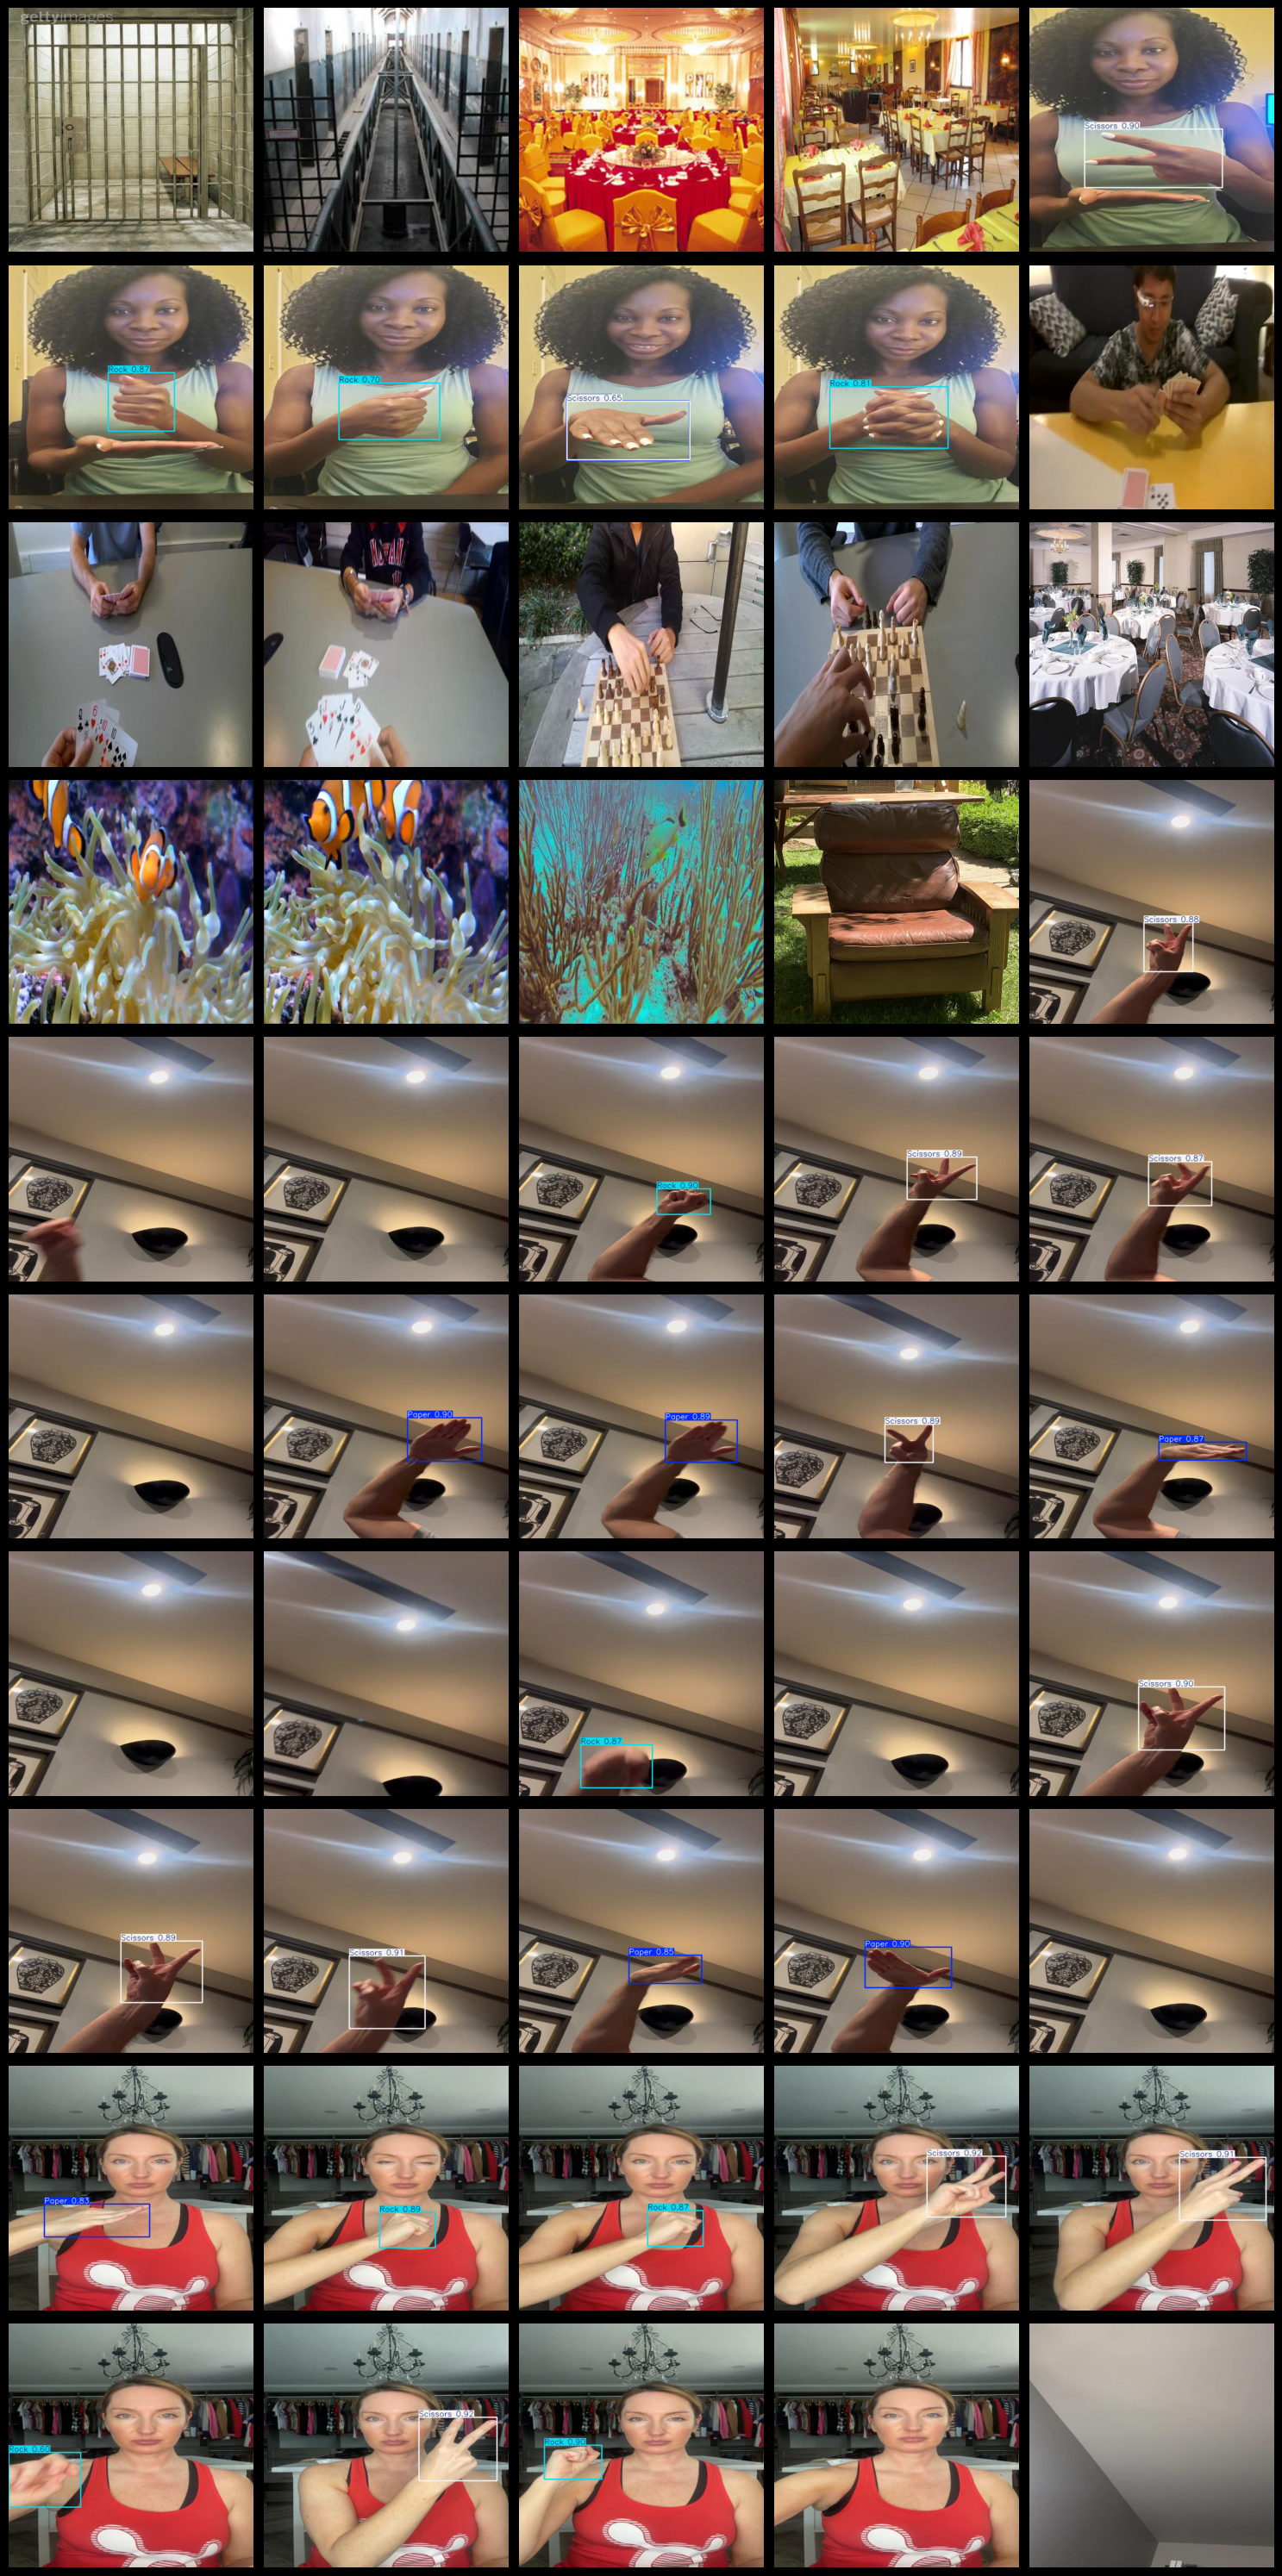

In [17]:
# Number of images to display
num_images = 50

# Set up the figure and grid
fig, axes = plt.subplots(10, 5, figsize=(15, 30))  # 10 rows and 5 columns

# Ensure there are enough images in the results
for i in range(min(num_images, len(results))):
    # Get the image with boxes drawn
    img_with_boxes = results[i].plot()  # This draws bounding boxes and labels on the image

    # Convert the image to RGB (matplotlib expects RGB, OpenCV uses BGR)
    img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    # Get the appropriate axis in the grid
    ax = axes[i // 5, i % 5]  # 5 columns
    ax.imshow(img_with_boxes)
    ax.axis('off')  # Hide the axes

# Adjust layout
plt.tight_layout()
plt.show()

<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>